# Loading Image Data

### Introduction

In this lesson, we'll walk through how to load up some image data from a file so that we can train a neural network.  As we'll see, we'll principally make use of two new libraries.  The `os` library for exploring and reading files, and the `cv2` library for preprocessing these files to feed into a neural network.

### Loading the Data

We can start by downloading our data from the [cat's dogs competition](https://www.kaggle.com/c/dogs-vs-cats) on Kaggle.  Once we unzip and download the data we can look at the files inside of our folder. 

In [40]:
ls dogs-vs-cats/train | head -n 3

cat.0.jpg
cat.1.jpg
cat.10.jpg


In [47]:
ls dogs-vs-cats/train/dog.0.jpg

dogs-vs-cats/train/dog.0.jpg


We can see that with each file, the name of the file *is* the label. 

### Using the OS Library

Now, it would be nice if we could list contents of a directory, and have the results be returned in Python.  We can accomplish this with the `os` library, which is built into Python.  First, let's list the files in the directory.

In [57]:
import os
train_dir = './dogs-vs-cats/train'
train_files = os.listdir(train_dir)

train_files[:3]

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg']

So by using the `listdir` method we now have the files listed as a list.  Next, we'll want to read the contents of each file.  To read the contents of a file, we'll need to have a full path to each file.  We can accomplish this with the `os.path.join` method.  For example, let's see this with the first file.

In [55]:
first_path = os.path.join("dogs-vs-cats/train", first_file)

In [56]:
first_path

'dogs-vs-cats/train/dog.8011.jpg'

Looks good.

### Reading Images

Ok, with the ability to return the relative path to an image, we can now read the contents of an image.  For this, we'll use the `cv2` library.

In [58]:
import cv2

We can use the `imread` method to read the pixels from an image.

In [67]:
img = cv2.imread(first_path, cv2.IMREAD_GRAYSCALE)

We now have a numpy array with each element a different pixel.

In [70]:
img[:3, :3]

array([[30, 34, 26],
       [30, 33, 25],
       [29, 32, 23]], dtype=uint8)

In [71]:
img.shape

(500, 380)

One thing we may notice is that we may many more pixels in this image than we have in our Mnist dataset.

In [74]:
import numpy as np
np.prod(img.shape)

190000

We can limit the number of pixels to limit the number of features, which will speed up training time.  Let's use the `resize` method.

In [75]:
resized_image = cv2.resize(img, (200, 200))

In [76]:
resized_image.shape

(200, 200)

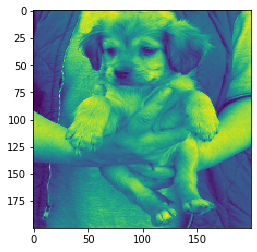

In [77]:
from matplotlib.pyplot import imshow

imshow(resized_image)

In [78]:
resized_image.shape

(200, 200)

### Saving a file

The last thing we should learn about is how to save data.  We can do so with the `np.save` method.

In [79]:
np.save("training_data.npy", resized_image)

We use the function by specifying the file path `.npy`, and the numpy array we wish to save.  Once saved, we can then load the data back into a numpy array.

In [2]:
import numpy as np
img_loaded = np.load("./training_data.npy")

In [3]:
img_loaded.shape

(200, 200)

### Summary

In this lesson, we saw how we can use the `os`, and `cv2` libraries to read image data.  We began by listing our files with the lines:

```python
import os
train_dir = './dogs-vs-cats/train'
train_files = os.listdir(train_dir)
```

Then we read an image by passing the relative path to the cv2 library:

```python
first_path = os.path.join("dogs-vs-cats/train", first_file)
img = cv2.imread(first_path, cv2.IMREAD_GRAYSCALE)
``` 
And finally, we saw that we can save our files with the `np.save` and `np.load` methods.

```python
np.save("training_data.npy", resized_image)
img_loaded = np.load("./training_data.npy")
```